# 作业第5周   循环神经网络练习

1.仿照课件关于IMDb数据集的分类训练，在课件示例基础上改用GRU、优化网络层数与其它参数，尽力提升分类准确率。<BR>
要求：使用callback方法保存最佳模型；训练完成后将保存在文件的模型读入，用于评估与预测测试集样本。<BR>
请每个人在"save"目录下建立以自己学号命名的子目录，然后在该子目录下保存文件

In [12]:
#首先执行GPU资源分配代码，勿删除。
import GPU
GPU.show()
GPU.alloc(0,1024)

Sun Jun  4 22:29:58 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:02:00.0 Off |                  N/A |
| 47%   55C    P2   183W / 350W |   7071MiB / 24268MiB |     88%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  Off  | 00000000:03:00.0 Off |                  N/A |
| 57%   

In [20]:
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence 
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np


In [21]:
max_features=20000# Only consider the top 20k words
maxlen=380# Only consider the first 380 words of each movie review

In [22]:
(x_train, y_train), (x_val, y_val) =keras.datasets.imdb.load_data(num_words=max_features)
print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")

25000 Training sequences
25000 Validation sequences


In [23]:
import os
os.name

'posix'

In [24]:
#os.mkdir("save/3200105974")

FileExistsError: [Errno 17] File exists: 'save/3200105974'

In [ ]:
#os.mkdir("save/3200105974/testdir")

In [25]:
x_train[0][:10]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

In [26]:
len(x_train[0])

218

In [27]:
y_train[0:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

In [28]:
word_index=keras.datasets.imdb.get_word_index()
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [30]:
index_to_word= {v:k for k, v in word_index.items()}
index_to_word

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [33]:
' '.join([index_to_word[x] for x in x_train[0]])

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but pratfalls to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other tricky in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of 'n odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit the

In [34]:
x_train_pad=sequence.pad_sequences(x_train, maxlen=maxlen)
x_val_pad=sequence.pad_sequences(x_val, maxlen=maxlen)

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import SimpleRNN,GRU
from tensorflow.keras.optimizers import SGD,Adam

In [110]:
model=Sequential()
model.add(Embedding(output_dim=64,input_dim=max_features, input_length=maxlen))

model.add(GRU(units=64, return_sequences=True))
model.add(Dropout(0.5))
model.add(GRU(units=64))
model.add(Dropout(0.5))

model.add(Dense(units=64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=1,activation='sigmoid' ))
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 380, 64)           1280000   
                                                                 
 gru_19 (GRU)                (None, 380, 64)           24960     
                                                                 
 dropout_32 (Dropout)        (None, 380, 64)           0         
                                                                 
 gru_20 (GRU)                (None, 64)                24960     
                                                                 
 dropout_33 (Dropout)        (None, 64)                0         
                                                                 
 dense_22 (Dense)            (None, 64)                4160      
                                                                 
 dropout_34 (Dropout)        (None, 64)              

In [114]:
callbacks_list=[
    keras.callbacks.EarlyStopping(
        monitor='accuracy',#监控精度
        patience=5,#5轮内不改善就中止
),
    keras.callbacks.ModelCheckpoint(
        filepath='save/3200105974/model.h5',#模型保存路径
        monitor='val_loss',#检测验证集损失值
        save_best_only=True#是否只保存最佳模型
    )
]

In [115]:
opt=Adam(learning_rate=1e-4, decay=1e-3)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [116]:
train_history=model.fit(x_train_pad, y_train,batch_size=128, epochs=10,verbose=1,callbacks=callbacks_list,validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 13s 55ms/step - loss: 0.6064 - accuracy: 0.7092 - val_loss: 0.5065 - val_accuracy: 0.7512
Epoch 2/10
157/157 [==============================] - 8s 49ms/step - loss: 0.3703 - accuracy: 0.8403 - val_loss: 0.3287 - val_accuracy: 0.8554
Epoch 3/10
157/157 [==============================] - 8s 49ms/step - loss: 0.2496 - accuracy: 0.9043 - val_loss: 0.3108 - val_accuracy: 0.8700
Epoch 4/10
157/157 [==============================] - 7s 48ms/step - loss: 0.1968 - accuracy: 0.9305 - val_loss: 0.3094 - val_accuracy: 0.8802
Epoch 5/10
157/157 [==============================] - 8s 49ms/step - loss: 0.1562 - accuracy: 0.9475 - val_loss: 0.3362 - val_accuracy: 0.8684
Epoch 6/10
157/157 [==============================] - 8s 51ms/step - loss: 0.1243 - accuracy: 0.9611 - val_loss: 0.3857 - val_accuracy: 0.8800
Epoch 7/10
157/157 [==============================] - 8s 51ms/step - loss: 0.1026 - accuracy: 0.9687 - val_loss: 0.3638 - val_accuracy: 0.880

In [117]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

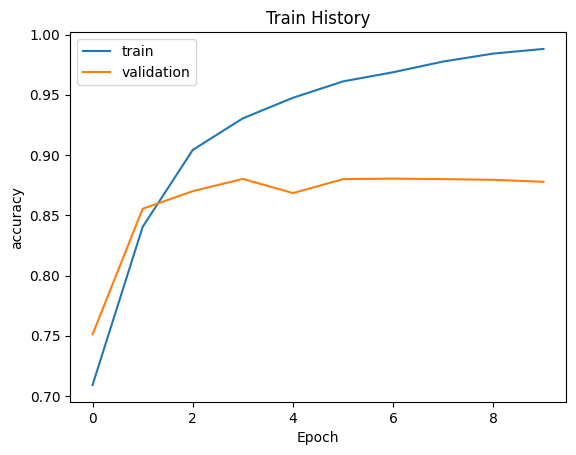

In [118]:
show_train_history(train_history,'accuracy','val_accuracy')

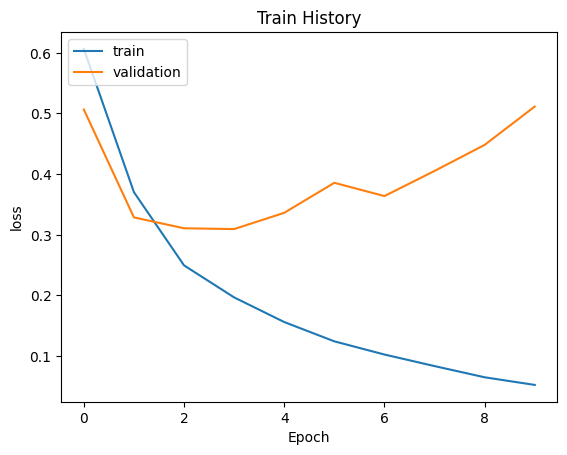

In [119]:
show_train_history(train_history,'loss','val_loss')

In [120]:
from tensorflow.keras.models import load_model
 
Bmodel = load_model('save/3200105974/model.h5') 
scores=Bmodel.evaluate(x_val_pad, y_val, verbose=1)
scores[1]

782/782 [==============================] - 16s 19ms/step - loss: 0.3235 - accuracy: 0.8708


0.8708000183105469